Euklidean Distance:

\begin{equation}
\sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
\end{equation}

In [105]:
import numpy as np
import pandas as pd
import math
from collections import Counter

X = np.array([
    [8,9,2],
    [1,2,1],
    [1,1,1],
    [2,3,1],
    [5,6,2],
    [5,7,2],
    [6,2,1],
    [0,6,2]
])

# requires np.array
def euklidean_distance(x, y):
    return math.sqrt(sum((x - y) ** 2))

def get_classes(X):
    d = {}
    for xs in X:
        if xs[-1] in d:
            d[xs[-1]].append(xs)
        else:
            d[xs[-1]] = [xs]
    return d

def k_nearest_neighbors(X, y, n_neighbors=5):
    distances = []
    for xs in X:
        features = xs[:-1]
        distance = euklidean_distance(features, y)
        distances.append((distance, xs[-1]))
        
    closest_vectors = sorted(distances)[:n_neighbors]
    class_counts = Counter([x[1] for x in closest_vectors]).most_common()
    return (max(class_counts, key=lambda x: x[1]))[0]
    
k_nearest_neighbors(X, [1, 2])

1

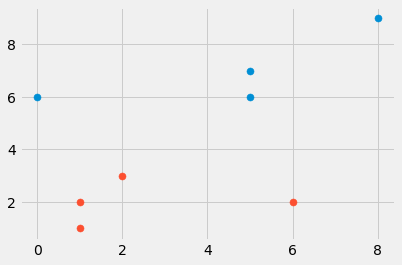

In [106]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

groups = get_classes(X)

for group in groups:
    plt.scatter(
        [x[0] for x in groups[group]],
        [x[1] for x in groups[group]],
        s=50
    )

In [115]:
from random import randint, random
def generate_vectors(num=10):
    vectors = []
    for _ in range(num):
        x = random() * 11
        y = random() * 11
        vectors.append([x, y])
    return np.array(vectors)

test_vectors = generate_vectors(10000)
y_pred = []

for v in test_vectors:
    group = k_nearest_neighbors(X, v, 5)
    y_pred.append(np.append(v, group))

new_points = np.vstack([X, y_pred])
groups = get_classes(X)

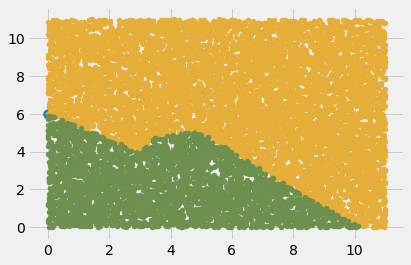

In [116]:
for group in groups:
    plt.scatter(
        [x[0] for x in groups[group]],
        [x[1] for x in groups[group]],
        s=100
    )
    
groups = get_classes(new_points)

for group in groups:
    plt.scatter(
        [x[0] for x in groups[group]],
        [x[1] for x in groups[group]],
        s=25
    )